In [1]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/clustering-categorical-peoples-interests/kaggle_Interests_group.csv


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/clustering-categorical-peoples-interests/kaggle_Interests_group.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Columns: 219 entries, group to interest217
dtypes: float64(217), int64(1), object(1)
memory usage: 10.6+ MB


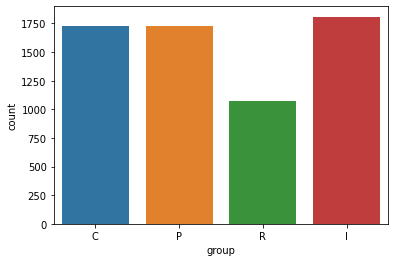

In [4]:
df.info()
sns.countplot(x='group',data=df)

In [5]:
#see the distinct values per column
for col in df:
    print(df[col].unique())

['C' 'P' 'R' 'I']
[ 17  43  27  34  36   6  54   2  29  44  39  28  47  38  37  11  71  48
   4   1  60  23  24  45  30  51  22   8  10  57  26  41  13  46  31  25
  62  32  56  42  49  55   3  66  58  21  70  35  61  40  63  69  52  59
  50  33   9  53  65  64  18  15  20  19  16  81  75  14  12  73  97   7
  76  74   5  68  89  67  80 104  84  82  77  72  99]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.  2.]
[nan  1.  2.]
[nan  1.]
[nan  1.]
[nan  1.  2.]
[nan  1.]
[nan  1.]
[ 1. nan  2.]
[nan  1.]
[nan  1.]
[nan  1.]
[ 1. nan  2.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[ 1. nan  2.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.  2.]
[nan  1.]
[nan  1.]
[nan  1.  2.]
[nan  1.]
[nan  1.]
[nan  1.  2.]
[nan  1.]
[nan  1.]
[nan  1.]
[ 1. nan  2.]
[nan  1.  2.]
[nan  1.]
[nan  1.  2.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[nan  1.]
[ 1. nan  2.]
[ 1. nan  2.]


In [6]:
#see the columns that real missing value, since the dataset also use NaN to indicate the value equal to zero
for col in df:
    if df[col].nunique()>1:
        print(col)
    else:
        pass

group
grand_tot_interests
interest5
interest6
interest9
interest12
interest16
interest21
interest37
interest40
interest43
interest47
interest48
interest50
interest57
interest58
interest59
interest61
interest62
interest63
interest64
interest66
interest70
interest71
interest78
interest79
interest80
interest81
interest83
interest84
interest89
interest90
interest92
interest97
interest104
interest109
interest110
interest112
interest115
interest117
interest118
interest119
interest120
interest124
interest127
interest137
interest139
interest142
interest144
interest147
interest148
interest149
interest154
interest157
interest160
interest162
interest164
interest180
interest181
interest183
interest189
interest200
interest202
interest204
interest205
interest208
interest210
interest211
interest212
interest215
interest216


In [7]:
#fill the NaN value with zero, only for columns use NaN to indicate the value equal to zero
a=[]
for col in df:
    if df[col].nunique()==1:
        a.append(col)
    else:
        pass
df[a] = df[a].fillna(0)


In [8]:
df.isnull().sum()

group                     0
grand_tot_interests       0
interest1                 0
interest2                 0
interest3                 0
                       ... 
interest213               0
interest214               0
interest215            1397
interest216            2282
interest217               0
Length: 219, dtype: int64

In [9]:
#drop the columns with the number of missing value >10% of total data
threshold=0.1*6340

b=[]
for col in df:
    if df[col].isnull().sum()>threshold:
        b.append(col)
    else:
        pass
df=df.drop(b,axis=1)

In [10]:
#drop the rows with the number of missing value from columns with the number of missing value <10% of total data
c=[]
for col in df:
    if (df[col].isnull().sum()<threshold) & (df[col].isnull().sum()>0):
        c.append(col)
    else:
        pass
df = df.dropna(subset=c)

In [11]:
for col in df:
    print(df[col].unique())

['C' 'P' 'R' 'I']
[ 43  27  36  54  29  44  39  28  47  38  37  71  48  60  23  24  45  51
  30  22  57  26  41  13  46  31  62  32  56  42  25  49  55  66  58  70
  34  35  61  40  63  69  52  59  21  50  33  53  65  64  18  20  17  19
  16  15  81  75  14  73  97  76  74  68  11  89  67   8  80 104  84  82
  77   9  12  72  99]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 2.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 2.]
[1. 2.]
[1. 0.]
[1. 2.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 

In [12]:
df['group'] = df['group'].map({'C':0,'P':1,'R':2,'I':3})

In [13]:
df #cleaned dataset

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest7,interest8,interest10,interest11,...,interest198,interest199,interest201,interest203,interest206,interest207,interest209,interest213,interest214,interest217
1,0,43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,3,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6336,3,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6337,3,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6338,3,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
x=df.drop('group',axis=1).values 
y=df['group'].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Decision Tree**

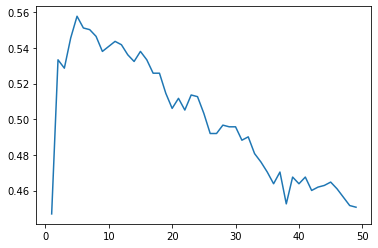

In [17]:
scores=[]
for i in range(1,50):
  tree=DecisionTreeClassifier(max_depth = i) 
  tree.fit(x_train, y_train) 
  scores.append(tree.score(x_test,y_test)) 
plt.plot(range(1,50),scores) 
plt.show()


In [18]:
tree=DecisionTreeClassifier(max_depth =5) 
tree.fit(x_train, y_train) 
tree.score(x_test,y_test)

0.5577464788732395

In [19]:
predictions = tree.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.38      0.51       271
           1       0.43      0.84      0.56       273
           2       0.45      0.23      0.30       197
           3       0.73      0.67      0.70       324

    accuracy                           0.56      1065
   macro avg       0.60      0.53      0.52      1065
weighted avg       0.62      0.56      0.54      1065

[[102 105  32  32]
 [  6 229  18  20]
 [  7 115  45  30]
 [ 12  89   5 218]]


**Random Forest**

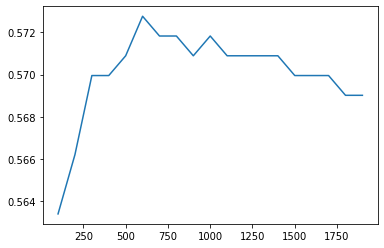

In [20]:
from sklearn.ensemble import RandomForestClassifier


scores=[]
for i in (np.arange(100,2000,100)):
  classifier = RandomForestClassifier(n_estimators =i, max_depth=10, random_state =101) 
  classifier.fit(x_train, y_train) 
  scores.append(classifier.score(x_test,y_test)) 
plt.plot(np.arange(100,2000,100),scores) 
plt.show()

In [21]:
classifier = RandomForestClassifier(n_estimators =700,max_depth=10, random_state =101)
classifier.fit(x_train, y_train)
print(classifier.score(x_test,y_test))

0.571830985915493


In [22]:
predictions = classifier.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.45      0.56       271
           1       0.43      0.86      0.58       273
           2       0.53      0.13      0.21       197
           3       0.72      0.70      0.71       324

    accuracy                           0.57      1065
   macro avg       0.61      0.53      0.52      1065
weighted avg       0.62      0.57      0.55      1065

[[122  99  17  33]
 [ 11 234   5  23]
 [ 14 125  26  32]
 [ 16  80   1 227]]


**KNN**

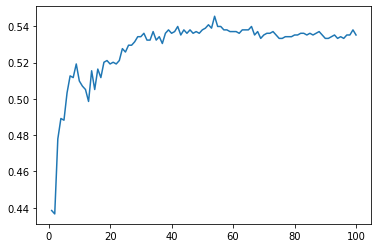

In [23]:
from sklearn.neighbors import KNeighborsClassifier

accuracies=[]
for k in range(1,101):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(x_train, y_train)
  accuracies.append(classifier.score(x_test, y_test)) 
  
k_list=list(range(1,101)) 

plt.plot(k_list,accuracies)
plt.show() 

In [24]:
classifier = KNeighborsClassifier(n_neighbors =54)
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test) 

0.5455399061032864

In [25]:
predictions = classifier.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.39      0.51       271
           1       0.42      0.86      0.56       273
           2       0.47      0.10      0.16       197
           3       0.69      0.68      0.69       324

    accuracy                           0.55      1065
   macro avg       0.58      0.51      0.48      1065
weighted avg       0.59      0.55      0.51      1065

[[106 112  12  41]
 [  9 235   7  22]
 [ 14 130  19  34]
 [ 15  86   2 221]]


**ANN**

In [26]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train) 
y_cat_test = to_categorical(y_test)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(units=160,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(0.01)))

model.add(Dense(units=4,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model.fit(x_train,y_cat_train,epochs=300,validation_data=(x_test,y_cat_test),verbose=1)

Train on 4256 samples, validate on 1065 samples
Epoch 1/300
4256/4256 [==============================] - 1s 217us/sample - loss: 8.0982 - accuracy: 0.4636 - val_loss: 1.5652 - val_accuracy: 0.5164
Epoch 2/300
4256/4256 [==============================] - 0s 65us/sample - loss: 1.3200 - accuracy: 0.5364 - val_loss: 1.2958 - val_accuracy: 0.5305
Epoch 3/300
4256/4256 [==============================] - 0s 64us/sample - loss: 1.2554 - accuracy: 0.5531 - val_loss: 1.2734 - val_accuracy: 0.5333
Epoch 4/300
4256/4256 [==============================] - 0s 63us/sample - loss: 1.2367 - accuracy: 0.5552 - val_loss: 1.2585 - val_accuracy: 0.5305
Epoch 5/300
4256/4256 [==============================] - 0s 63us/sample - loss: 1.2233 - accuracy: 0.5564 - val_loss: 1.2469 - val_accuracy: 0.5352
Epoch 6/300
4256/4256 [==============================] - 0s 64us/sample - loss: 1.2168 - accuracy: 0.5552 - val_loss: 1.2420 - val_accuracy: 0.5390
Epoch 7/300
4256/4256 [==============================] - 0s 63u

In [30]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1348093009330857, 0.5793427]


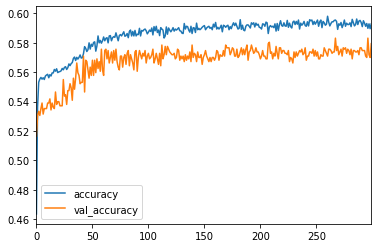

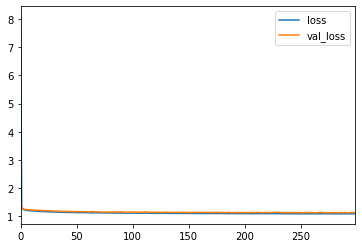

In [31]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.75      0.45      0.56       271
           1       0.46      0.77      0.58       273
           2       0.42      0.27      0.33       197
           3       0.72      0.71      0.72       324

    accuracy                           0.58      1065
   macro avg       0.59      0.55      0.55      1065
weighted avg       0.61      0.58      0.57      1065

